### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [12]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
# For 'car', since most values are missing, we'll drop this column
data = data.drop('car', axis=1)

In [18]:
# For other columns with missing values, we'll fill with 'Unknown'
columns_with_missing = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in columns_with_missing:
    data[col].fillna('Unknown', inplace=True)

C:\Users\josea\AppData\Local\Temp\ipykernel_40452\458202121.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)


In [20]:
# Verify that we've handled all missing values
print(data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [28]:
acceptance_rate = data['Y'].mean()
print(f"Proportion of accepted coupons: {acceptance_rate:.0%}")

Proportion of accepted coupons: 57%


5. Use a bar plot to visualize the `coupon` column.

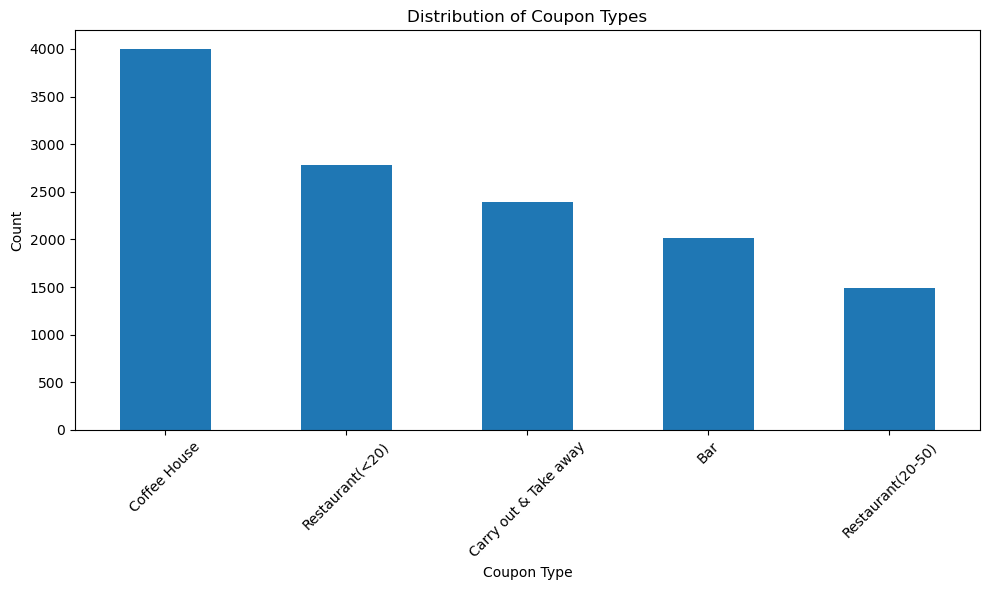

In [30]:
plt.figure(figsize=(10, 6))
data['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

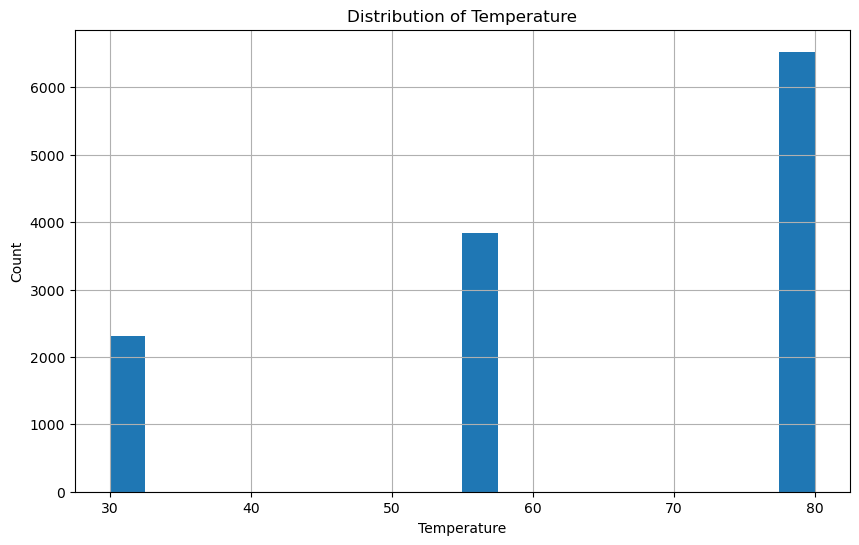

In [32]:
plt.figure(figsize=(10, 6))
data['temperature'].hist(bins=20)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [39]:
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of accepted bar coupons: {bar_acceptance_rate:.0%}")

Proportion of accepted bar coupons: 41%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [41]:
low_freq = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()
high_freq = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()
print(f"Acceptance rate for low frequency bar goers: {low_freq:.0%}")
print(f"Acceptance rate for high frequency bar goers: {high_freq:.0%}")

Acceptance rate for low frequency bar goers: 37%
Acceptance rate for high frequency bar goers: 77%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
freq_over_25 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8'])) & (bar_coupons['age'] != 'below21')]['Y'].mean()
others = bar_coupons[~((bar_coupons['Bar'].isin(['4~8', 'gt8'])) & (bar_coupons['age'] != 'below21'))]['Y'].mean()
print(f"Acceptance rate for frequent bar goers over 25: {freq_over_25:.0%}")
print(f"Acceptance rate for others: {others:.0%}")

Acceptance rate for frequent bar goers over 25: 77%
Acceptance rate for others: 37%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [45]:
condition = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
            (bar_coupons['passanger'] != 'Kid(s)') & \
            (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
freq_specific = bar_coupons[condition]['Y'].mean()
others_specific = bar_coupons[~condition]['Y'].mean()
print(f"Acceptance rate for frequent bar goers with specific conditions: {freq_specific:.0%}")
print(f"Acceptance rate for others: {others_specific:.0%}")


Acceptance rate for frequent bar goers with specific conditions: 71%
Acceptance rate for others: 30%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [47]:
condition1 = (bar_coupons['Bar'].isin(['4~8', 'gt8'])) & \
             (bar_coupons['passanger'] != 'Kid(s)') & \
             (bar_coupons['maritalStatus'] != 'Widowed')
condition2 = (bar_coupons['Bar'].isin(['4~8', 'gt8'])) & \
             (bar_coupons['age'].isin(['21', '26', '31']))
condition3 = (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
             (bar_coupons['income'].isin(['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']))

combined_condition = condition1 | condition2 | condition3
combined_rate = bar_coupons[combined_condition]['Y'].mean()
others_rate = bar_coupons[~combined_condition]['Y'].mean()
print(f"Acceptance rate for combined conditions: {combined_rate:.0%}")
print(f"Acceptance rate for others: {others_rate:.0%}")

Acceptance rate for combined conditions: 53%
Acceptance rate for others: 37%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Observations

* Frequent bar-goers are more likely to accept bar coupons.
* Drivers over 25 who frequently visit bars have a higher acceptance rate.
* Drivers without children in the car are more likely to accept bar coupons.
* Younger drivers (under 30) who frequently visit bars have a high acceptance rate.
* Income and dining habits at cheap restaurants may also influence bar coupon acceptance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [50]:
# Create a DataFrame with just coffee house coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']

In [52]:
# Proportion of accepted coffee house coupons
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"Proportion of accepted coffee house coupons: {coffee_acceptance_rate:.0%}")

Proportion of accepted coffee house coupons: 49.92%


In [54]:
# Acceptance rate based on coffee house visit frequency
low_freq_coffee = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['never', 'less1', '1~3'])]['Y'].mean()
high_freq_coffee = coffee_coupons[coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]['Y'].mean()
print(f"Acceptance rate for low frequency coffee house goers: {low_freq_coffee:.0%}")
print(f"Acceptance rate for high frequency coffee house goers: {high_freq_coffee:.0%}")

Acceptance rate for low frequency coffee house goers: 44.94%
Acceptance rate for high frequency coffee house goers: 67.50%


In [56]:
# Acceptance rate based on time of day
morning = coffee_coupons[coffee_coupons['time'] == '10AM']['Y'].mean()
afternoon = coffee_coupons[coffee_coupons['time'] == '2PM']['Y'].mean()
evening = coffee_coupons[coffee_coupons['time'] == '6PM']['Y'].mean()
print(f"Acceptance rate for morning coupons: {morning:.0%}")
print(f"Acceptance rate for afternoon coupons: {afternoon:.0%}")
print(f"Acceptance rate for evening coupons: {evening:.0%}")

Acceptance rate for morning coupons: 64.07%
Acceptance rate for afternoon coupons: 54.79%
Acceptance rate for evening coupons: 41.26%


In [58]:
# Acceptance rate based on weather
sunny = coffee_coupons[coffee_coupons['weather'] == 'Sunny']['Y'].mean()
rainy = coffee_coupons[coffee_coupons['weather'] == 'Rainy']['Y'].mean()
snowy = coffee_coupons[coffee_coupons['weather'] == 'Snowy']['Y'].mean()
print(f"Acceptance rate for sunny weather: {sunny:.0%}")
print(f"Acceptance rate for rainy weather: {rainy:.0%}")
print(f"Acceptance rate for snowy weather: {snowy:.0%}")

Acceptance rate for sunny weather: 50.36%
Acceptance rate for rainy weather: 52.21%
Acceptance rate for snowy weather: 43.23%


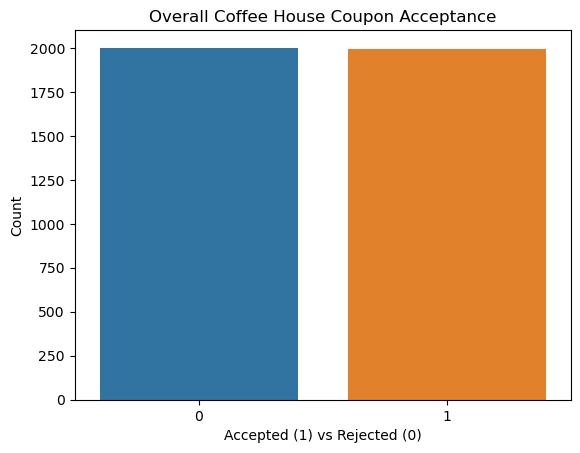

In [65]:
sns.countplot(x='Y', data=coffee_coupons)
plt.title('Overall Coffee House Coupon Acceptance')
plt.xlabel('Accepted (1) vs Rejected (0)')
plt.ylabel('Count')
plt.show()

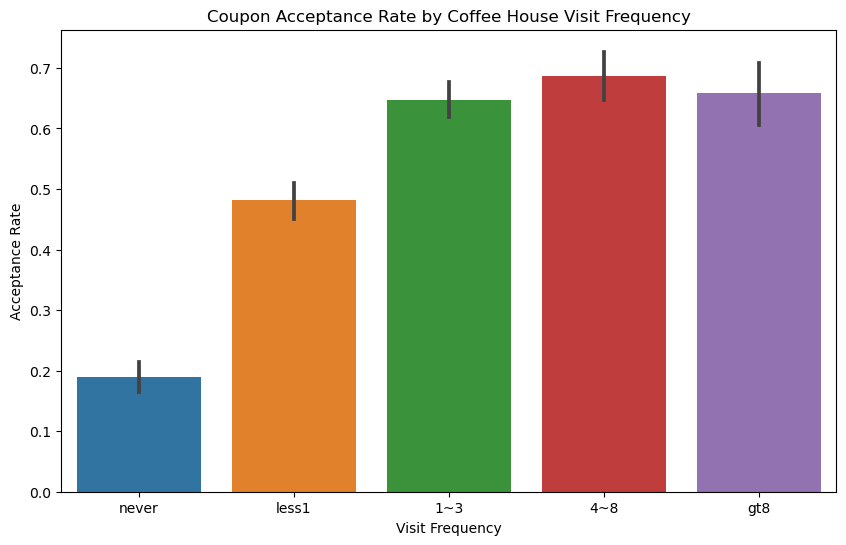

In [67]:
# 2. Frequency of Coffee House Visits
plt.figure(figsize=(10, 6))
sns.barplot(x='CoffeeHouse', y='Y', data=coffee_coupons, order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.title('Coupon Acceptance Rate by Coffee House Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.show()

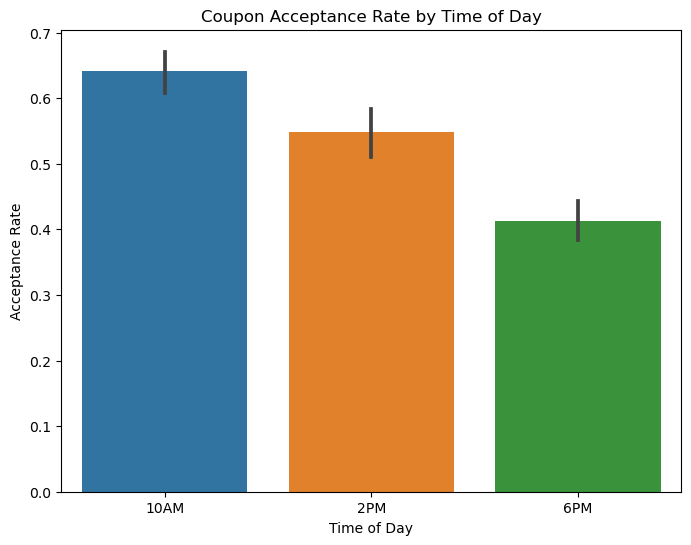

In [69]:
# 3. Time of Day
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='Y', data=coffee_coupons, order=['10AM', '2PM', '6PM'])
plt.title('Coupon Acceptance Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.show()

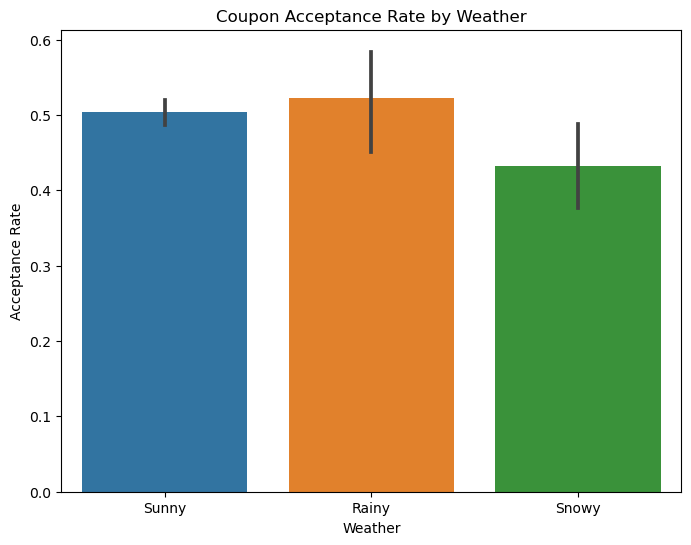

In [71]:
# 4. Weather Conditions
plt.figure(figsize=(8, 6))
sns.barplot(x='weather', y='Y', data=coffee_coupons)
plt.title('Coupon Acceptance Rate by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.show()

C:\Users\josea\AppData\Local\Temp\ipykernel_40452\2530574292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_coupons['time_temp'] = pd.to_datetime(coffee_coupons['time'], format='%I%p')


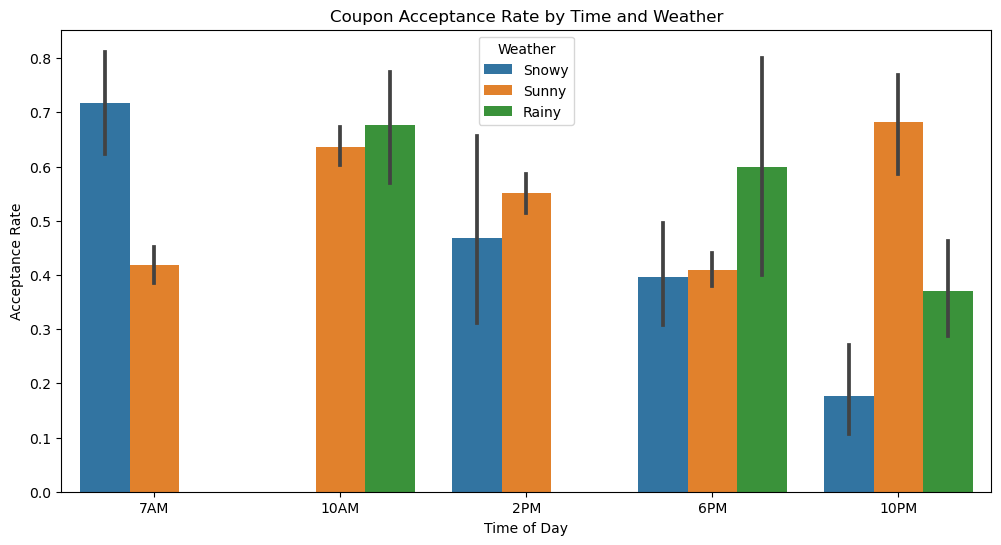

In [77]:
# 5. Combined Visualization: Time and Weather

# Convert 'time' to datetime objects (temporary transformation for sorting)
coffee_coupons['time_temp'] = pd.to_datetime(coffee_coupons['time'], format='%I%p')

# Sort by the temporary datetime column
coffee_coupons_sorted = coffee_coupons.sort_values('time_temp')

# Drop the temporary column after sorting
coffee_coupons_sorted = coffee_coupons_sorted.drop(columns=['time_temp'])

# 5. Combined Visualization: Time and Weather
plt.figure(figsize=(12, 6))
sns.barplot(x='time', y='Y', hue='weather', data=coffee_coupons_sorted)
plt.title('Coupon Acceptance Rate by Time and Weather')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.legend(title='Weather')
plt.show()

### Observations

* Coffee house coupons have a moderate acceptance rate, with about half of the drivers accepting them.
* Frequent coffee house visitors are significantly more likely to accept coupons compared to infrequent visitors.
    * Drivers who visit coffee houses frequently (4 or more times a month) have a much higher acceptance rate (67.50%) compared to those who visit less frequently (44.94%).
* The time of day significantly influences coupon acceptance rates for coffee houses. This suggests that drivers are more likely to accept coffee house coupons earlier in the day.
    * Morning coupons (10AM) have the highest acceptance rate (64.07%), followed by afternoon coupons (2PM) at 54.79%.
    * Evening coupons (6PM) have the lowest acceptance rate (41.26%). 
* Weather has a moderate impact on coffee house coupon acceptance rates. This suggests that drivers are slightly more inclined to accept coffee house coupons during rainy weather, possibly seeking a warm beverage or shelter.
    * Rainy weather shows the highest acceptance rate (52.21%), followed closely by sunny weather (50.36%).
    * Snowy weather has the lowest acceptance rate (43.23%).
* Overall, it seems that the ideal strategy for coffee house coupons is:
    * Targeting frequent coffee house visitors
    * Offering coupons in the morning or early afternoon
    * Weather won't cause a huge difference, but targetting rainy days can provide a slight increase in acceptance.